# CSIR CDRI Internship Test. - Jaivarsan. B

It has been done according to the **research** paper,

K. Altun, B. Barshan, and O. Tunçel,
`Comparative study on classifying human activities with miniature inertial and magnetic sensors`,
Pattern Recognition, 43(10):3605-3620, October 2010.


Where they take the input segment, that's a 5 second window of a patient performing an activity, which has 125 observations ( 5 x 25Hz ) with 45 features, because of 9 axes of each sensor unit on torso, left hand, right hand, left leg, right leg. They convert the 125x45 into a handcrafted meaningful 1170x1 matrix.

The 1170 features represents, 
    * 225 features ( min, max, mean, skewness, kurtosis of all 9 axes of all 5 units, thus 5x9x5 ) i.e., first_step
    * 225 features which represent the maximum 5 peaks of the DFT applied on each of the 9 axes of all the 5 units i.e.,
    second_step
    * 225 features which represent the corresponding frequency of the 5 peaks of the DFT over the time series i.e.,
    third_step.
    * 495 features which represent the autocorrelation of the series, 11 hand picked values from the 125 
    autocorrelation values for each axes, thus 11 x 9 x 5 = 495 i.e, fourth_step.
    
Adding them all 225 + 225 + 225 + 495 = 1170, for each segment, i.e., each text file.

Then these values are normalized in the range [0,1], and stored along with the patient ID and activity ID for that segment / text file.

The test I performed includes two parts, one with 9120 x 1170 matrix, and another with 9120 x 30 matrix, I did PCA over the initial matrix, unfortunately, the PCA didn't live up to my expectations, so I'm producing both results.

I request you to consider my 9120 x 1170 dataset into consideration, and its results.

## Preprocessing

In [168]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv('s01.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.15730,0.70097,...,-0.036453,-2.8071,-9.0812,2.6220,-0.000232,-0.012092,-0.004457,0.74017,0.30053,-0.057730
1,8.1305,1.0202,5.3843,-0.009368,0.023485,0.001953,-0.78717,-0.068275,0.15890,0.71829,...,-0.034005,-2.8146,-9.0737,2.6218,-0.014784,-0.016477,0.002789,0.73937,0.30183,-0.057514
2,8.1604,1.0201,5.3622,0.015046,0.014330,0.000204,-0.78664,-0.068277,0.15879,0.69849,...,-0.036489,-2.8221,-9.0886,2.6366,-0.012770,0.005717,-0.007918,0.73955,0.30052,-0.057219
3,8.1603,1.0052,5.3770,0.006892,0.018045,0.005649,-0.78529,-0.069849,0.15912,0.72799,...,-0.036151,-2.8071,-9.0811,2.6070,-0.005725,0.009620,0.006555,0.74029,0.30184,-0.057750
4,8.1605,1.0275,5.3473,0.008811,0.030433,-0.005346,-0.78742,-0.068796,0.15916,0.71572,...,-0.033807,-2.8146,-9.0737,2.6218,-0.003929,-0.008371,0.002816,0.73845,0.30090,-0.057527


In [3]:
# we need to convert these 125 x 45 columns into 1170 x 1

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,7.975714,1.083150,5.606846,0.004897,0.026123,-0.003726,-0.790726,-0.068490,0.135897,0.679134,...,-0.035894,-2.814833,-9.085131,2.618207,-0.005036,0.002166,-0.003155,0.739615,0.301314,-0.057119
std,0.119981,0.046987,0.181035,0.015592,0.036279,0.007920,0.002870,0.001751,0.015907,0.039324,...,0.001074,0.019892,0.013178,0.018793,0.007633,0.007310,0.007074,0.000850,0.000792,0.000823
min,7.682300,0.997440,5.316900,-0.039399,-0.080639,-0.030754,-0.795540,-0.071582,0.109560,0.585420,...,-0.039347,-2.867500,-9.112400,2.571100,-0.024685,-0.019207,-0.021531,0.737520,0.299680,-0.059241
25%,7.876300,1.035000,5.436400,-0.005710,0.010725,-0.008867,-0.793210,-0.069849,0.119820,0.649210,...,-0.036599,-2.822500,-9.089400,2.608400,-0.009489,-0.003025,-0.007918,0.739000,0.300710,-0.057598
50%,7.958700,1.080700,5.608100,0.005122,0.023588,-0.003457,-0.791610,-0.068773,0.135040,0.688700,...,-0.035765,-2.815000,-9.088600,2.622000,-0.005644,0.001586,-0.002558,0.739550,0.301320,-0.057208
75%,8.108200,1.124000,5.749300,0.014090,0.043022,0.001953,-0.787430,-0.067195,0.155050,0.708470,...,-0.035240,-2.807500,-9.074500,2.625000,-0.000232,0.007598,0.001253,0.740240,0.301830,-0.056500
max,8.160500,1.183200,6.181400,0.045403,0.214760,0.015614,-0.785290,-0.064353,0.159160,0.759300,...,-0.033109,-2.747600,-9.044500,2.669600,0.015853,0.020288,0.013777,0.742380,0.303420,-0.054963


Calculating min, max, mean, skew and curtosis for all 45 axes.

In [5]:
first_step = list(df.min())+list(df.max())+list(df.mean())+list(df.skew())+list(df.kurtosis())
len(first_step)

225

Calculating DFT

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.15730,0.70097,...,-0.036453,-2.8071,-9.0812,2.6220,-0.000232,-0.012092,-0.004457,0.74017,0.30053,-0.057730
1,8.1305,1.0202,5.3843,-0.009368,0.023485,0.001953,-0.78717,-0.068275,0.15890,0.71829,...,-0.034005,-2.8146,-9.0737,2.6218,-0.014784,-0.016477,0.002789,0.73937,0.30183,-0.057514
2,8.1604,1.0201,5.3622,0.015046,0.014330,0.000204,-0.78664,-0.068277,0.15879,0.69849,...,-0.036489,-2.8221,-9.0886,2.6366,-0.012770,0.005717,-0.007918,0.73955,0.30052,-0.057219
3,8.1603,1.0052,5.3770,0.006892,0.018045,0.005649,-0.78529,-0.069849,0.15912,0.72799,...,-0.036151,-2.8071,-9.0811,2.6070,-0.005725,0.009620,0.006555,0.74029,0.30184,-0.057750
4,8.1605,1.0275,5.3473,0.008811,0.030433,-0.005346,-0.78742,-0.068796,0.15916,0.71572,...,-0.033807,-2.8146,-9.0737,2.6218,-0.003929,-0.008371,0.002816,0.73845,0.30090,-0.057527


In [7]:
df.as_matrix().shape

(125, 45)

In [8]:
# I'm gonna convert the 125 x 45 matrix as 45 vectors of the dimension 125 x 1, that is Transpose

In [17]:
df.as_matrix().T

array([[ 8.1305  ,  8.1305  ,  8.1604  , ...,  7.9517  ,  7.9743  ,  7.9812  ],
       [ 1.0349  ,  1.0202  ,  1.0201  , ...,  1.1466  ,  1.1542  ,  1.0945  ],
       [ 5.4217  ,  5.3843  ,  5.3622  , ...,  5.6081  ,  5.5038  ,  5.6005  ],
       ..., 
       [ 0.74017 ,  0.73937 ,  0.73955 , ...,  0.73945 ,  0.7403  ,
         0.73897 ],
       [ 0.30053 ,  0.30183 ,  0.30052 , ...,  0.30342 ,  0.30027 ,
         0.30275 ],
       [-0.05773 , -0.057514, -0.057219, ..., -0.056789, -0.056704,
        -0.056262]])

In [10]:
dft_matrix = np.fft.fft(df.as_matrix().T)
dft_matrix

array([[  9.96964300e+02 +0.00000000e+00j,
          6.82091976e+00 -6.84917855e+00j,
         -1.53490535e+00 -3.24821215e-01j, ...,
         -4.18487957e-01 +6.43827006e-01j,
         -1.53490535e+00 +3.24821215e-01j,
          6.82091976e+00 +6.84917855e+00j],
       [  1.35393810e+02 +0.00000000e+00j,
         -6.02662401e-01 +3.04781499e+00j,
          1.88982223e-01 +1.18731082e+00j, ...,
         -2.99035182e-01 -3.77556488e-01j,
          1.88982223e-01 -1.18731082e+00j,
         -6.02662401e-01 -3.04781499e+00j],
       [  7.00855800e+02 +0.00000000e+00j,
         -9.59384443e+00 +9.20132161e+00j,
          1.98649365e+00 -2.11594225e-01j, ...,
          1.35861527e+00 -7.82430548e-01j,
          1.98649365e+00 +2.11594225e-01j,
         -9.59384443e+00 -9.20132161e+00j],
       ..., 
       [  9.24518400e+01 +0.00000000e+00j,
          3.65364166e-03 +1.53477972e-02j,
         -3.51854014e-03 +7.08006424e-03j, ...,
          2.12567143e-03 -2.46017755e-03j,
         -3.518540

In [27]:
dft_matrix[0][np.absolute(dft_matrix)[0].argsort()[-5:][::-1]] # these are the five maximum values from 0th column

array([  9.96964300e+02+0.j        ,   6.82091976e+00-6.84917855j,
         6.82091976e+00+6.84917855j,   6.87482726e-02-1.99417014j,
         6.87482726e-02+1.99417014j])

How? The process is shown below.

In [28]:
abs_dft_matrix = np.absolute(dft_matrix) # taking the absolute value of the complex numbers, to find the maximum values.

In [29]:
abs_dft_matrix[0][abs_dft_matrix[0].argsort()[-5:][::-1]] # these are the 5 maximum absolute values for the above cell values.

array([ 996.9643    ,    9.66623987,    9.66623987,    1.99535482,
          1.99535482])

In [31]:
positions = abs_dft_matrix[0].argsort()[-5:][::-1] # these are the positions mentioned for the above mentioned cell values.
positions

array([  0,   1, 124,   5, 120])

In [39]:
# If T is the total amount of time passed in your signal that you are taking the dft with
# and k is the index
# then the frequency at index k is
# 2 pi k / T
f_k = (2*math.pi)/5
f_k

1.2566370614359172

In [41]:
positions*f_k

array([   0.        ,    1.25663706,  155.82299562,    6.28318531,
        150.79644737])

In [57]:
second_step =[]
third_step = []
for i in range(len(abs_dft_matrix)):
    positions = abs_dft_matrix[i].argsort()[-5:][::-1]
    second_step.append(list(abs_dft_matrix[i][positions]))
    third_step.append(list(positions*f_k))

In [59]:
second_step = [item for sublist in second_step for item in sublist] # flattening the lists.
third_step = [item for sublist in third_step for item in sublist]

Calculating autocorrelation

![autocorrelation formula from pg 3/16 of the research paper](autocorrelation.png)

In [164]:
autocorr_reqd = [0,4,9,14,19,24,29,34,39,44,49] # getting the required autocorr values as mentioned in the paper.
len(autocorr_reqd)

11

In [172]:
fourth_step = []
autocorr_reqd = [0,4,9,14,19,24,29,34,39,44,49]

for column in df.columns:
    mean = df[column].mean()
    for delta in range(len(df)):
        if(delta in autocorr_reqd):
            sum_of_products = 0
            for i, row in enumerate(df[column], start = delta):
                element_1 = row - mean
                element_2 = df[column].iloc[len(df)-1-i] - mean
                sum_of_products += element_1*element_2
            rss = 1/(len(df)-delta)*sum_of_products 
            fourth_step.append(rss)

len(fourth_step)

495

Done with feature engineering, combining all the efforts.

In [174]:
final_representation = first_step + second_step + third_step + fourth_step
len(final_representation)

1170

In [184]:
arr = np.asarray(final_representation)
normalized = (arr-min(arr))/(max(arr)-min(arr))

In [187]:
normalized

array([ 0.01467101,  0.00883145,  0.01260472, ...,  0.00796014,
        0.00796014,  0.00796014])

In [189]:
normalized.shape

(1170,)

In [194]:
normalized.reshape(-1,1)

array([[ 0.01467101],
       [ 0.00883145],
       [ 0.01260472],
       ..., 
       [ 0.00796014],
       [ 0.00796014],
       [ 0.00796014]])

I guess PCA requires all, the data, instead of just on vector

In [198]:
# from sklearn.decomposition import PCA
# X = normalized
# pca = PCA(n_components=30, svd_solver='full')
# pca.fit(X.reshape(-1,1))

# ValueError: n_components=30 must be between 0 and n_features=1 with svd_solver='full'

## Gathering all the input and labelling them.

In [199]:
import os

In [200]:
os.getcwd()

'/media/greed/Windows8_OS/Me/Files/Projects/ML and DS/Daily_sports_and_activities'

In [217]:
def preprocess(filename):
    """
    A function which will take the text file name and preprocess using the techniques followed
    in the above cells to reduce 125 x 45 into a 1170,1 and return it.
    It also returns the patient identity and activity identity.
    """
    df = pd.read_csv('{}'.format(filename), header=None)
    
    # first step
    first_step = list(df.min())+list(df.max())+list(df.mean())+list(df.skew())+list(df.kurtosis())
    
    # second step and third step
    f_k = (2*math.pi)/5
    second_step =[]
    third_step = []
    for i in range(len(abs_dft_matrix)):
        positions = abs_dft_matrix[i].argsort()[-5:][::-1]
        second_step.append(list(abs_dft_matrix[i][positions]))
        third_step.append(list(positions*f_k))
    second_step = [item for sublist in second_step for item in sublist] # flattening the lists.
    third_step = [item for sublist in third_step for item in sublist]
    
    # fourth step   
    fourth_step = []
    autocorr_reqd = [0,4,9,14,19,24,29,34,39,44,49]

    for column in df.columns:
        mean = df[column].mean()
        for delta in range(len(df)):
            if(delta in autocorr_reqd):
                sum_of_products = 0
                for i, row in enumerate(df[column], start = delta):
                    element_1 = row - mean
                    element_2 = df[column].iloc[len(df)-1-i] - mean
                    sum_of_products += element_1*element_2
                rss = 1/(len(df)-delta)*sum_of_products 
                fourth_step.append(rss)
    
    # finalizing
    final_representation = first_step + second_step + third_step + fourth_step
    arr = np.asarray(final_representation)
    normalized = (arr-min(arr))/(max(arr)-min(arr))
    

    return normalized, patient, activity_folder

In [ ]:
normalized_values_list = []
patient_label_list = []
activity_label_list = []


for activity_folder in name_of_activity:
    
    os.chdir('/media/greed/Windows8_OS/Me/Files/Projects/ML and DS/Daily_sports_and_activities/data')
    # going inside each activity folder
    os.chdir(activity_folder)
    print(activity_folder)
    patient_files = os.listdir()
    
    for patient in patient_files:
        
        # going into every patient folder
        os.chdir(patient)
        print(patient)
        segment_files = os.listdir()
        
        # getting all the segment txt files inside the patient folder
        print(segment_files)
        
        for filename in segment_files:
            
            # obtaining the 1170x1 vector, patient id, activity id from the text file.
            print('Doing {}'.format(filename))
            normalized, patient, activity_folder = preprocess(filename)
            
            normalized_values_list.append(list(normalized)) # a 2D list with 9120 lists insdie it, each has 1170 values.
            patient_label_list.append(patient) # a 1D list with 9120 patient ids.
            activity_label_list.append(activity_folder) # a 1D list iwth 9120 activity ids.
        
        os.chdir('/media/greed/Windows8_OS/Me/Files/Projects/ML and DS/Daily_sports_and_activities/data/{}'.format(activity_folder))


In [226]:
normalized_values_list[0][0:10]

[0.014742296336893494,
 0.0090230219313977081,
 0.012502701438187162,
 0.0079369476901982802,
 0.0079449685812037901,
 0.0079448410436208216,
 0.0072731014676780436,
 0.0078975708982297246,
 0.0080660794929524986,
 0.0082585389469204285]

In [224]:
temp = pd.DataFrame(normalized_values_list)

In [225]:
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169
0,0.014742,0.009023,0.012503,0.007937,0.007945,0.007945,0.007273,0.007898,0.008066,0.008259,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966
1,0.014671,0.008831,0.012605,0.007926,0.007890,0.007933,0.007265,0.007898,0.008056,0.008472,...,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960
2,0.014821,0.008891,0.012470,0.007938,0.007930,0.007946,0.007272,0.007903,0.008075,0.008430,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966
3,0.014823,0.008911,0.012706,0.007943,0.007937,0.007951,0.007274,0.007905,0.008077,0.008436,...,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968
4,0.014680,0.008905,0.012661,0.007929,0.007932,0.007930,0.007267,0.007895,0.008066,0.008413,...,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962


In [228]:
temp.to_csv('ninekrecords.csv', header = False, index= False) # saving it as a csv file.

In [229]:
actual = temp

In [230]:
temp['patient'] = patient_label_list # updating the df with the labels.
temp['activity'] = activity_label_list

In [232]:
actual.head()

,0,1,2,3,4,5,6,7,8,9,...,1162,1163,1164,1165,1166,1167,1168,1169,patient,activity
0,0.014742,0.009023,0.012503,0.007937,0.007945,0.007945,0.007273,0.007898,0.008066,0.008259,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,p1,a01
1,0.014671,0.008831,0.012605,0.007926,0.007890,0.007933,0.007265,0.007898,0.008056,0.008472,...,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,p1,a01
2,0.014821,0.008891,0.012470,0.007938,0.007930,0.007946,0.007272,0.007903,0.008075,0.008430,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,p1,a01
3,0.014823,0.008911,0.012706,0.007943,0.007937,0.007951,0.007274,0.007905,0.008077,0.008436,...,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,p1,a01
4,0.014680,0.008905,0.012661,0.007929,0.007932,0.007930,0.007267,0.007895,0.008066,0.008413,...,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,p1,a01


In [233]:
temp.to_csv('ninekrecordswlabels.csv', header = False, index= False) # saving with the labels.

Successfully saved the file.

Going ahead with PCA now.

In [259]:
temp.drop(['patient', 'activity'], axis = 1, inplace = True)

In [239]:
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169
0,0.014742,0.009023,0.012503,0.007937,0.007945,0.007945,0.007273,0.007898,0.008066,0.008259,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966
1,0.014671,0.008831,0.012605,0.007926,0.007890,0.007933,0.007265,0.007898,0.008056,0.008472,...,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960
2,0.014821,0.008891,0.012470,0.007938,0.007930,0.007946,0.007272,0.007903,0.008075,0.008430,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966
3,0.014823,0.008911,0.012706,0.007943,0.007937,0.007951,0.007274,0.007905,0.008077,0.008436,...,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968
4,0.014680,0.008905,0.012661,0.007929,0.007932,0.007930,0.007267,0.007895,0.008066,0.008413,...,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962


Im gonna try with `PCA` to see whether 9120x1170 fairs better or 9120x30, yes I'm going to reduce 1170 features into 30.

In [241]:
from sklearn.decomposition import PCA
X = actual.as_matrix()
pca = PCA(n_components=30)
pca.fit(X)
X_dash = pca.transform(X)

In [243]:
X_dash # the reduced matrix.

array([[ -5.55855639e-01,   2.50681716e-05,   4.18788360e-04, ...,
         -1.56821266e-04,  -2.13399660e-04,  -5.53551064e-04],
       [ -5.56309979e-01,   2.82745468e-05,   4.18077173e-04, ...,
         -1.03343276e-04,  -1.72688514e-04,  -4.90035550e-04],
       [ -5.55609418e-01,   1.79540654e-05,   4.19014734e-04, ...,
         -5.78772252e-05,  -4.11797203e-04,  -6.16432059e-04],
       ..., 
       [  5.44632267e-01,  -8.36528542e-02,  -7.06172225e-02, ...,
          2.58918466e-03,   4.61738342e-03,  -3.68394173e-03],
       [  9.44554381e-01,   4.37055906e-04,  -1.28225558e-02, ...,
         -4.00693495e-03,   6.12902191e-03,  -1.36532122e-02],
       [  1.98146480e+00,   3.82718952e-03,   3.52893969e-02, ...,
          1.08709486e-02,  -8.98053803e-03,  -5.71206037e-03]])

In [244]:
new_df = pd.DataFrame(X_dash) # passing the array into a dataframe.

In [245]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.555856,0.000025,0.000419,0.000038,-0.000716,-0.000726,0.001239,-0.000194,0.002798,0.012813,...,9.791382e-05,-0.000164,0.001206,0.000655,0.000001,-0.000071,-0.000121,-0.000157,-0.000213,-0.000554
1,-0.556310,0.000028,0.000418,0.000036,-0.000713,-0.000724,0.001234,-0.000199,0.002731,0.012509,...,3.022188e-05,-0.000034,0.001149,0.000652,-0.000043,-0.000076,-0.000117,-0.000103,-0.000173,-0.000490
2,-0.555609,0.000018,0.000419,0.000021,-0.000703,-0.000718,0.001231,-0.000156,0.002711,0.012504,...,-9.478823e-05,0.000144,0.000851,0.000605,-0.000239,-0.000013,-0.000219,-0.000058,-0.000412,-0.000616
3,-0.555990,0.000029,0.000417,0.000039,-0.000715,-0.000728,0.001247,-0.000215,0.002794,0.012732,...,4.157959e-05,-0.000068,0.001167,0.000664,-0.000019,-0.000037,-0.000138,-0.000130,-0.000105,-0.000490
4,-0.555658,0.000019,0.000425,0.000024,-0.000701,-0.000714,0.001223,-0.000171,0.002714,0.012477,...,2.772035e-07,0.000019,0.001020,0.000639,-0.000154,-0.000130,-0.000097,-0.000048,-0.000214,-0.000560


In [246]:
new_df.shape

(9120, 30)

Finally converted it into 9120 x 30. 

In [248]:
new_df['patient'] = patient_label_list  # setting the labels along with the reduced df
new_df['activity'] = activity_label_list

In [249]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,patient,activity
0,-0.555856,0.000025,0.000419,0.000038,-0.000716,-0.000726,0.001239,-0.000194,0.002798,0.012813,...,0.001206,0.000655,0.000001,-0.000071,-0.000121,-0.000157,-0.000213,-0.000554,p1,a01
1,-0.556310,0.000028,0.000418,0.000036,-0.000713,-0.000724,0.001234,-0.000199,0.002731,0.012509,...,0.001149,0.000652,-0.000043,-0.000076,-0.000117,-0.000103,-0.000173,-0.000490,p1,a01
2,-0.555609,0.000018,0.000419,0.000021,-0.000703,-0.000718,0.001231,-0.000156,0.002711,0.012504,...,0.000851,0.000605,-0.000239,-0.000013,-0.000219,-0.000058,-0.000412,-0.000616,p1,a01
3,-0.555990,0.000029,0.000417,0.000039,-0.000715,-0.000728,0.001247,-0.000215,0.002794,0.012732,...,0.001167,0.000664,-0.000019,-0.000037,-0.000138,-0.000130,-0.000105,-0.000490,p1,a01
4,-0.555658,0.000019,0.000425,0.000024,-0.000701,-0.000714,0.001223,-0.000171,0.002714,0.012477,...,0.001020,0.000639,-0.000154,-0.000130,-0.000097,-0.000048,-0.000214,-0.000560,p1,a01


In [250]:
os.chdir('/media/greed/Windows8_OS/Me/Files/Projects/ML and DS/Daily_sports_and_activities')

In [251]:
new_df.to_csv('pcafilewlabels.csv', header = False, index= False )

The whole preprocessing is done. Next moving onto prediction.

# Prediction of activity without PCA

In [381]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

Adding the necessary libraries and adding the labels to the matrix.

In [269]:
actual['patient'] = patient_label_list
actual['activity'] = activity_label_list

The step below does LabelEncoding,  which is converting all string categories ('a1', 'a2',.. and 'p1', 'p2'...) into numerical categories [0, 1, 2 .. 18] for `activity` , since `scikit-learn` understands numbers only.

In [273]:
X2 = actual.iloc[:,1170:1172]
X2 = X2.apply(LabelEncoder().fit_transform)

In [271]:
actual.head()

,0,1,2,3,4,5,6,7,8,9,...,1162,1163,1164,1165,1166,1167,1168,1169,patient,activity
0,0.014742,0.009023,0.012503,0.007937,0.007945,0.007945,0.007273,0.007898,0.008066,0.008259,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,p1,a01
1,0.014671,0.008831,0.012605,0.007926,0.007890,0.007933,0.007265,0.007898,0.008056,0.008472,...,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,p1,a01
2,0.014821,0.008891,0.012470,0.007938,0.007930,0.007946,0.007272,0.007903,0.008075,0.008430,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,p1,a01
3,0.014823,0.008911,0.012706,0.007943,0.007937,0.007951,0.007274,0.007905,0.008077,0.008436,...,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,p1,a01
4,0.014680,0.008905,0.012661,0.007929,0.007932,0.007930,0.007267,0.007895,0.008066,0.008413,...,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,p1,a01


In [272]:
X2 = actual.iloc[:,1170:1172]
X2.head()

,patient,activity
0,p1,a01
1,p1,a01
2,p1,a01
3,p1,a01
4,p1,a01


In [275]:
actual.drop(['patient', 'activity'], axis = 1, inplace = True)

Merging the LabelEncoded df , X2 with actual and storing it in X_t

In [276]:
X_t = actual.join(X2)
X_t.head()

,0,1,2,3,4,5,6,7,8,9,...,1162,1163,1164,1165,1166,1167,1168,1169,patient,activity
0,0.014742,0.009023,0.012503,0.007937,0.007945,0.007945,0.007273,0.007898,0.008066,0.008259,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0,0
1,0.014671,0.008831,0.012605,0.007926,0.007890,0.007933,0.007265,0.007898,0.008056,0.008472,...,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0,0
2,0.014821,0.008891,0.012470,0.007938,0.007930,0.007946,0.007272,0.007903,0.008075,0.008430,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0,0
3,0.014823,0.008911,0.012706,0.007943,0.007937,0.007951,0.007274,0.007905,0.008077,0.008436,...,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0,0
4,0.014680,0.008905,0.012661,0.007929,0.007932,0.007930,0.007267,0.007895,0.008066,0.008413,...,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0,0


The cell below takes the first 1170 columns, and sends it to `X`, and takes the series `X_t['activity']` and sends it to `y`, later with the help of `train_test_split` from `sklearn` the dataset is separated into `X_train, X_test, y_train, y_test` with training set containing 75% of the data, and testing set containing 25% of the data.

In [457]:
X = X_t.iloc[:,0:1170]
y = X_t['activity']

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 451)

In [416]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6840, 1170), (2280, 1170), (6840,), (2280,))

In [282]:
k_range = range(1, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

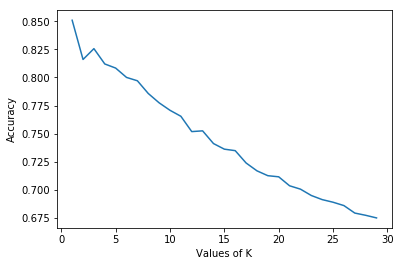

In [283]:
import matplotlib.pyplot as plt

# for plotting the graph inside the notebook itself
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Values of K')
plt.ylabel('Accuracy')

Testing the dataset with several models. For top 5 models go [here](http://localhost:8888/notebooks/csir_cdri_test.ipynb#Better-models.-(-%3E-85%-accuracy-).

## Dumb models. (< 85% accuracy)

### 1 . Support Vector Machine.

In [409]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.265350877193


### 2. Naive Bayes.

In [410]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.319736842105


### 3. Logistic Regression

In [400]:
model = LogisticRegression(penalty='l1', tol = 0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.714912280702


### 4. k Nearest Neighbors ( k = 3 ).

In [403]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.831140350877


### 5. Neural Nets. With 'Adam' optimizer and ReLU activation, with one hidden layer of 100 neurons.

In [408]:
model = MLPClassifier(max_iter = 500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.848684210526


In [459]:
model = MLPClassifier(max_iter = 450)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.85


## Better models. ( > 85% accuracy ).

For this kind of data, ensemble techniques seem to be the best, we can see that below.

### 1. Decision Tree Classifier.

In [407]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.855263157895


### 2. ExtraTrees Classifier

In [411]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.887280701754


### 3. RandomForest Classifier

In [412]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.901754385965


### 4. Bagging Classifier

In [413]:
model = BaggingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.910087719298


### 5. Gradient Boosting Classifier

In [286]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.936877076412


# Prediction of Patient without passing the activity.

In [422]:
X_t.head()

,0,1,2,3,4,5,6,7,8,9,...,1162,1163,1164,1165,1166,1167,1168,1169,patient,activity
0,0.014742,0.009023,0.012503,0.007937,0.007945,0.007945,0.007273,0.007898,0.008066,0.008259,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0,0
1,0.014671,0.008831,0.012605,0.007926,0.007890,0.007933,0.007265,0.007898,0.008056,0.008472,...,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0,0
2,0.014821,0.008891,0.012470,0.007938,0.007930,0.007946,0.007272,0.007903,0.008075,0.008430,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0,0
3,0.014823,0.008911,0.012706,0.007943,0.007937,0.007951,0.007274,0.007905,0.008077,0.008436,...,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0,0
4,0.014680,0.008905,0.012661,0.007929,0.007932,0.007930,0.007267,0.007895,0.008066,0.008413,...,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0,0


In [424]:
X = X_t.iloc[:, 0:1170]
y = X_t['patient']

In [425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 451)

In [431]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.640789473684


In [432]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.71798245614


In [434]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.757456140351


In [455]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.796929824561


In [435]:
model = BaggingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.824122807018


# the bonus task

# Prediction of Patient with activity.

In [439]:
X_t.head()

,0,1,2,3,4,5,6,7,8,9,...,1162,1163,1164,1165,1166,1167,1168,1169,patient,activity
0,0.014742,0.009023,0.012503,0.007937,0.007945,0.007945,0.007273,0.007898,0.008066,0.008259,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0,0
1,0.014671,0.008831,0.012605,0.007926,0.007890,0.007933,0.007265,0.007898,0.008056,0.008472,...,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0,0
2,0.014821,0.008891,0.012470,0.007938,0.007930,0.007946,0.007272,0.007903,0.008075,0.008430,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0,0
3,0.014823,0.008911,0.012706,0.007943,0.007937,0.007951,0.007274,0.007905,0.008077,0.008436,...,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0,0
4,0.014680,0.008905,0.012661,0.007929,0.007932,0.007930,0.007267,0.007895,0.008066,0.008413,...,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0,0


In [460]:
X = X_t.iloc[:, 0:1170].join(X_t['activity'])
y = X_t['patient']

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 451)

In [447]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.657894736842


In [448]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.739473684211


In [450]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.762719298246


In [452]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.792105263158


In [451]:
model = BaggingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.824561403509


** Please go check the PCA ipynb, then proceed downwards, I did them parallely thus two ipynbs **

# Conclusion

## Actual Dataset, 9120 x 1172

### Predicting Activity with signals.


|**Model**                    |**Accuracy**|
|-----------------------------|------------|
|Gradient Boosting Classifier | 0.9368 |
|Bagging Classifier|0.9100|
|Random Forest Classifier|0.9017|
|ExtraTrees Classifier|0.8872|
|Decision Tree|0.8552|

*Runner up*: Neural Networks (DNN) : 0.85

### Predicting Patient with signals and activity, The bonus task.


|**Model**                    |**Accuracy**|
|-----------------------------|------------|
|Bagging Classifier|0.8245|
|Gradient Boosting Classifier | 0.7921 |
|Random Forest Classifier|0.7627|
|Decision Tree|0.7394|
|kNN (k=3) |0.6578|


### Also Predicting Patient with signals alone, also has been performed, and the results can be seen by scrolling up, they are almost on par with the above results.

## PCA reduced Dataset, 9120 x 32

### Predicting Activity with signals.


|**Model**                    |**Accuracy**|
|-----------------------------|------------|
|ExtraTrees Classifier|0.8767|
|Gradient Boosting Classifier | 0.8745 |
|Random Forest Classifier|0.8596|


*Runner up*: Bagging Classifier : 0.8320, Neural Networks (DNN) : 0.8192

#### With Neural Networks


|**Model**                    |**Accuracy**|
|-----------------------------|------------|
|MLP with Adam + ReLU |0.8065|
|MLP with Adam + Sigmoid | 0.7771 |

MLP with SGD are worse than I expected, they converged within 1000 epochs, with accuracy < 40%, whereas Adam optmizers made it possible with less than 500 epochs and accuracy > 75%.

### Predicting Patient with activity also has been done, but the results are far from comparable to the results from the actual dataset.